Number of regions: 3266
Region 1:
  Area: 1417367.0
  Centroid: (753.9875720261583, 1048.7859629862978)
  Eccentricity: 0.8886087914567293
Region 2:
  Area: 290144.0
  Centroid: (340.5329974081835, 2381.2726921804347)
  Eccentricity: 0.8150732461749726
Region 3:
  Area: 1.0
  Centroid: (0.0, 2516.0)
  Eccentricity: 0
Region 4:
  Area: 1805.0
  Centroid: (16.62382271468144, 2567.996675900277)
  Eccentricity: 0.8360939470898329
Region 5:
  Area: 1.0
  Centroid: (15.0, 2195.0)
  Eccentricity: 0
Region 6:
  Area: 1.0
  Centroid: (23.0, 1707.0)
  Eccentricity: 0
Region 7:
  Area: 4.0
  Centroid: (48.25, 2588.0)
  Eccentricity: 0.7905694150420949
Region 8:
  Area: 2.0
  Centroid: (50.5, 2575.0)
  Eccentricity: 1.0
Region 9:
  Area: 1.0
  Centroid: (95.0, 2440.0)
  Eccentricity: 0
Region 10:
  Area: 2.0
  Centroid: (111.0, 1712.5)
  Eccentricity: 1.0
Region 11:
  Area: 1.0
  Centroid: (164.0, 1081.0)
  Eccentricity: 0
Region 12:
  Area: 1.0
  Centroid: (226.0, 1280.0)
  Eccentricity: 0
Region

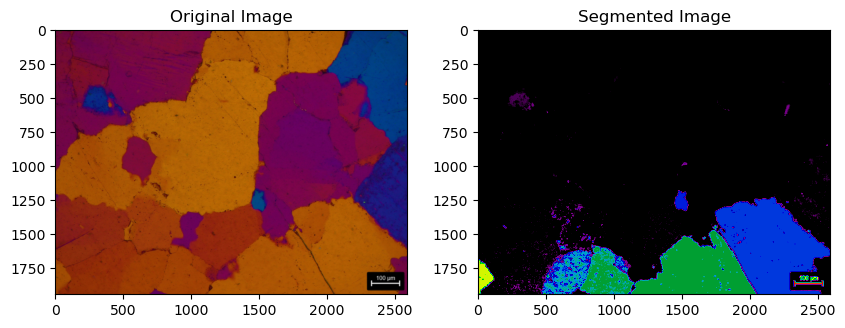

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('6.jpg')

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Apply Otsu's thresholding for segmentation
thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

# Label the connected regions
label_image = label(binary_image)

# Get the properties of the labeled regions
regions = regionprops(label_image)

# Display the original image
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Segmented Image')

# Print the number of regions and their properties
print(f"Number of regions: {len(regions)}")
for i, region in enumerate(regions):
    print(f"Region {i + 1}:")
    print(f"  Area: {region.area}")
    print(f"  Centroid: {region.centroid}")
    print(f"  Eccentricity: {region.eccentricity}")

plt.show()

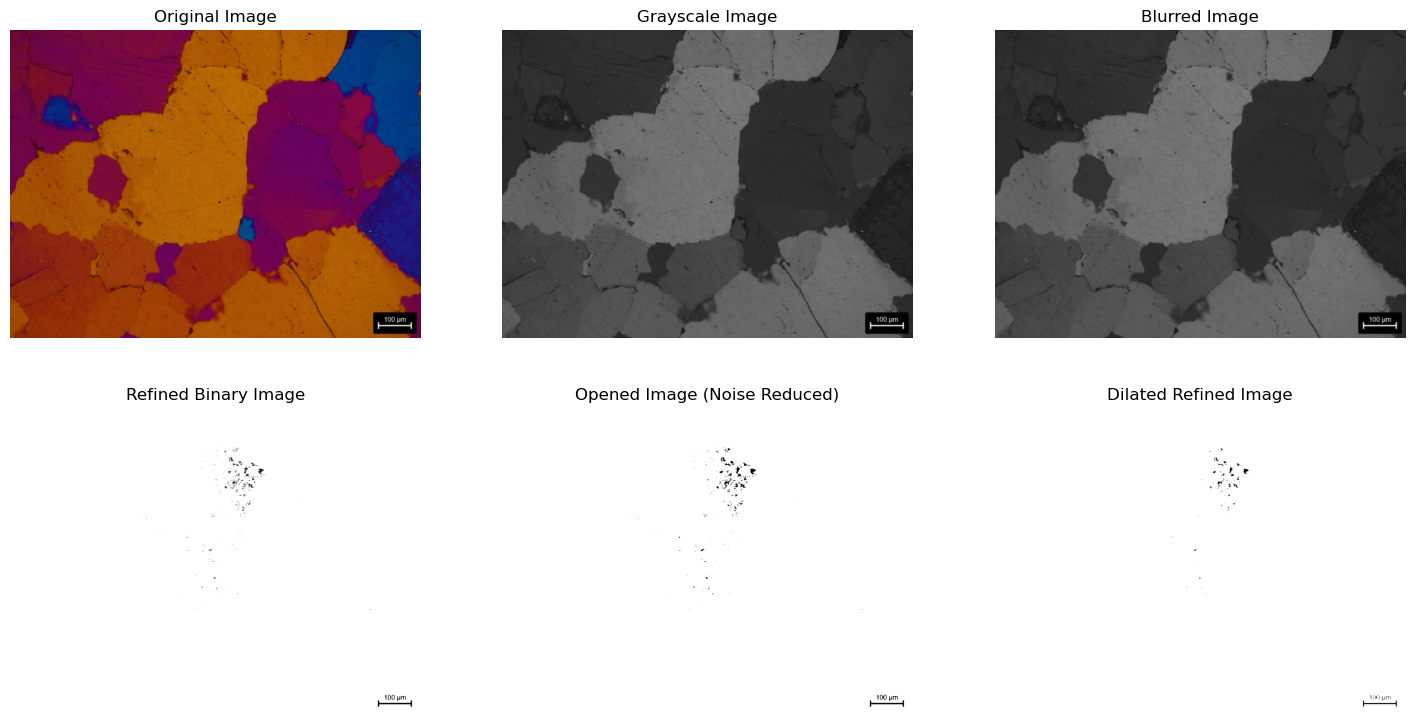

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply binary thresholding
_, refined_binary_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY_INV)

# Apply morphological opening to reduce noise
opening_kernel = np.ones((3, 3), np.uint8)
opened_image = cv2.morphologyEx(refined_binary_image, cv2.MORPH_OPEN, opening_kernel, iterations=2)

# Apply dilation to enhance edges
dilated_refined_image = cv2.dilate(opened_image, opening_kernel, iterations=1)

# Display the original and processed images
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Refined Binary Image')
plt.imshow(refined_binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Opened Image (Noise Reduced)')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Dilated Refined Image')
plt.imshow(dilated_refined_image, cmap='gray')
plt.axis('off')

plt.show()


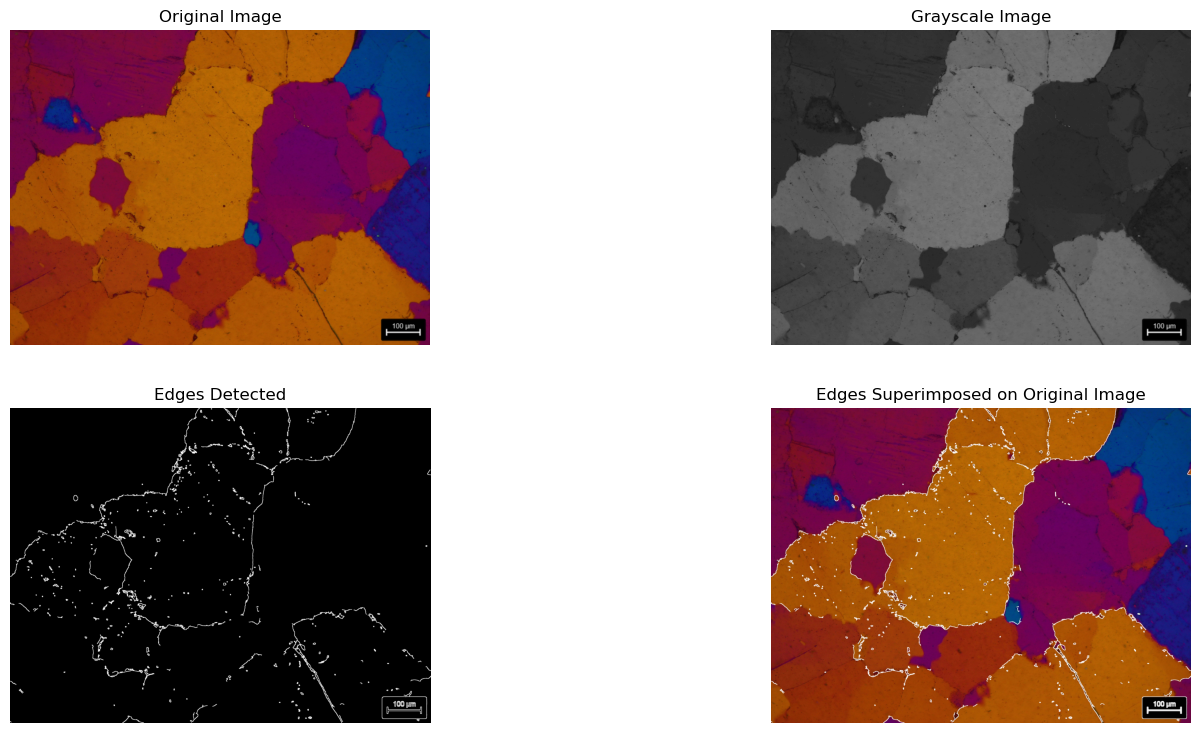

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# Dilate the edges to make them more visible
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Superimpose edges on the original image
image_with_edges = cv2.bitwise_or(image, cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR))

# Display the original and processed images
plt.figure(figsize=(18, 9))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Edges Detected')
plt.imshow(dilated_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Edges Superimposed on Original Image')
plt.imshow(cv2.cvtColor(image_with_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


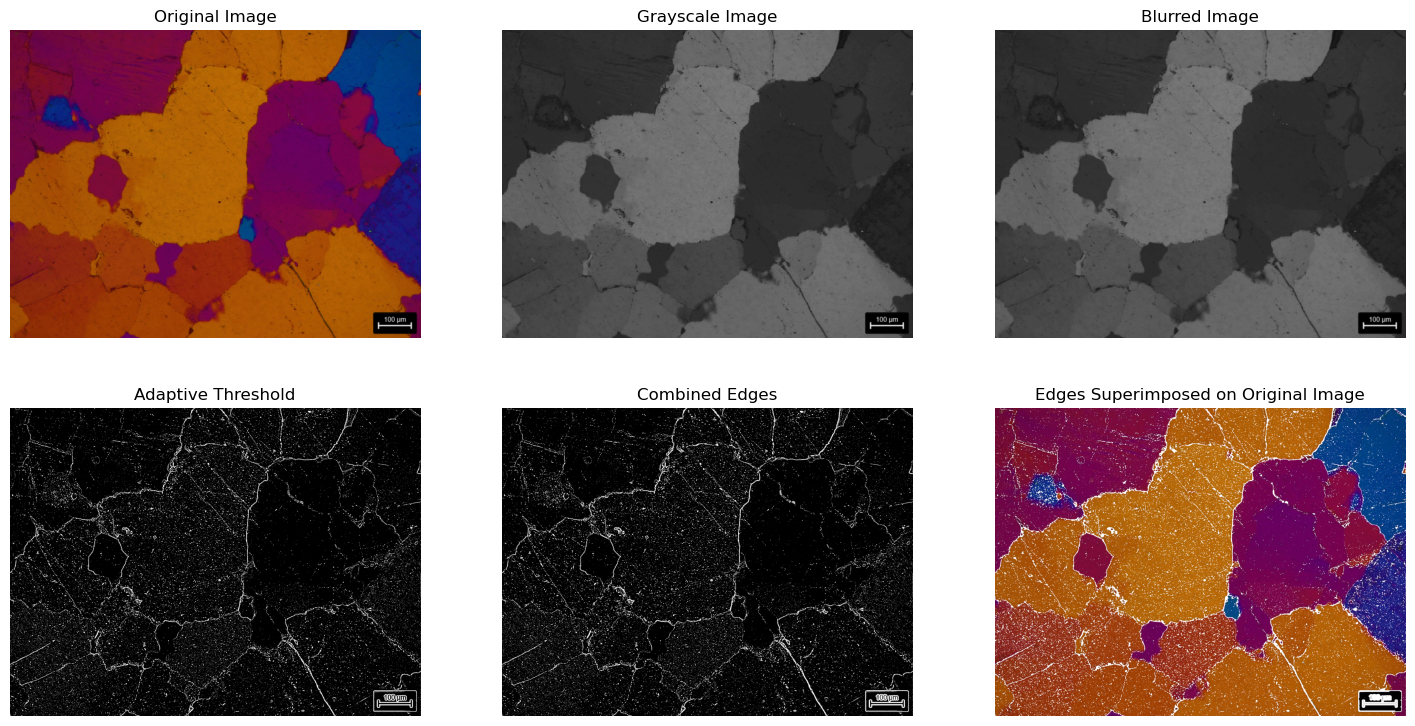

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Combine the adaptive threshold and Canny edges
combined_edges = cv2.bitwise_or(adaptive_thresh, edges)

# Apply morphological operations to clean up the edges
kernel = np.ones((3, 3), np.uint8)
morph_edges = cv2.morphologyEx(combined_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Superimpose edges on the original image
image_with_edges = cv2.bitwise_or(image, cv2.cvtColor(morph_edges, cv2.COLOR_GRAY2BGR))

# Display the original and processed images
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Adaptive Threshold')
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Combined Edges')
plt.imshow(combined_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Edges Superimposed on Original Image')
plt.imshow(cv2.cvtColor(image_with_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


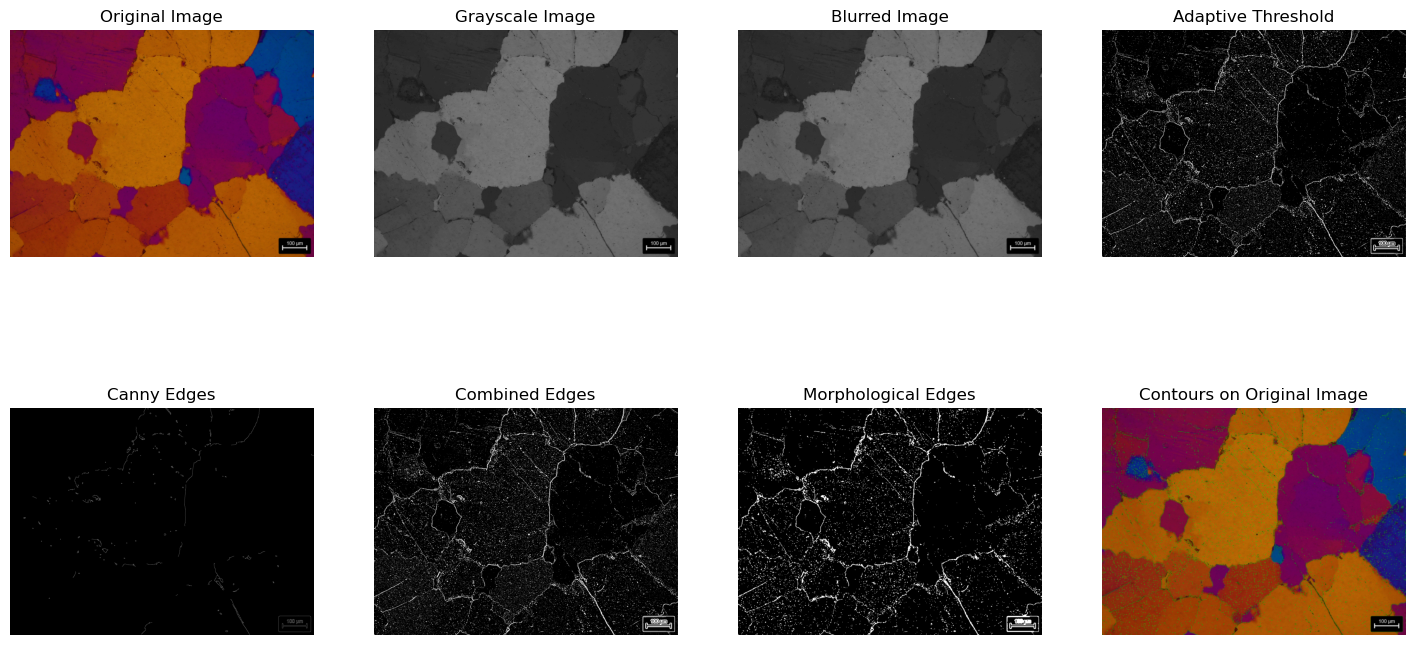

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Combine the adaptive threshold and Canny edges
combined_edges = cv2.bitwise_or(adaptive_thresh, edges)

# Apply morphological operations to clean up the edges
kernel = np.ones((3, 3), np.uint8)
morph_edges = cv2.morphologyEx(combined_edges, cv2.MORPH_CLOSE, kernel, iterations=2)
morph_edges = cv2.morphologyEx(morph_edges, cv2.MORPH_OPEN, kernel, iterations=1)

# Superimpose edges on the original image
image_with_edges = cv2.bitwise_or(image, cv2.cvtColor(morph_edges, cv2.COLOR_GRAY2BGR))

# Find contours
contours, _ = cv2.findContours(morph_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)

# Display the original and processed images
plt.figure(figsize=(18, 9))

plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Adaptive Threshold')
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Combined Edges')
plt.imshow(combined_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Morphological Edges')
plt.imshow(morph_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Contours on Original Image')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


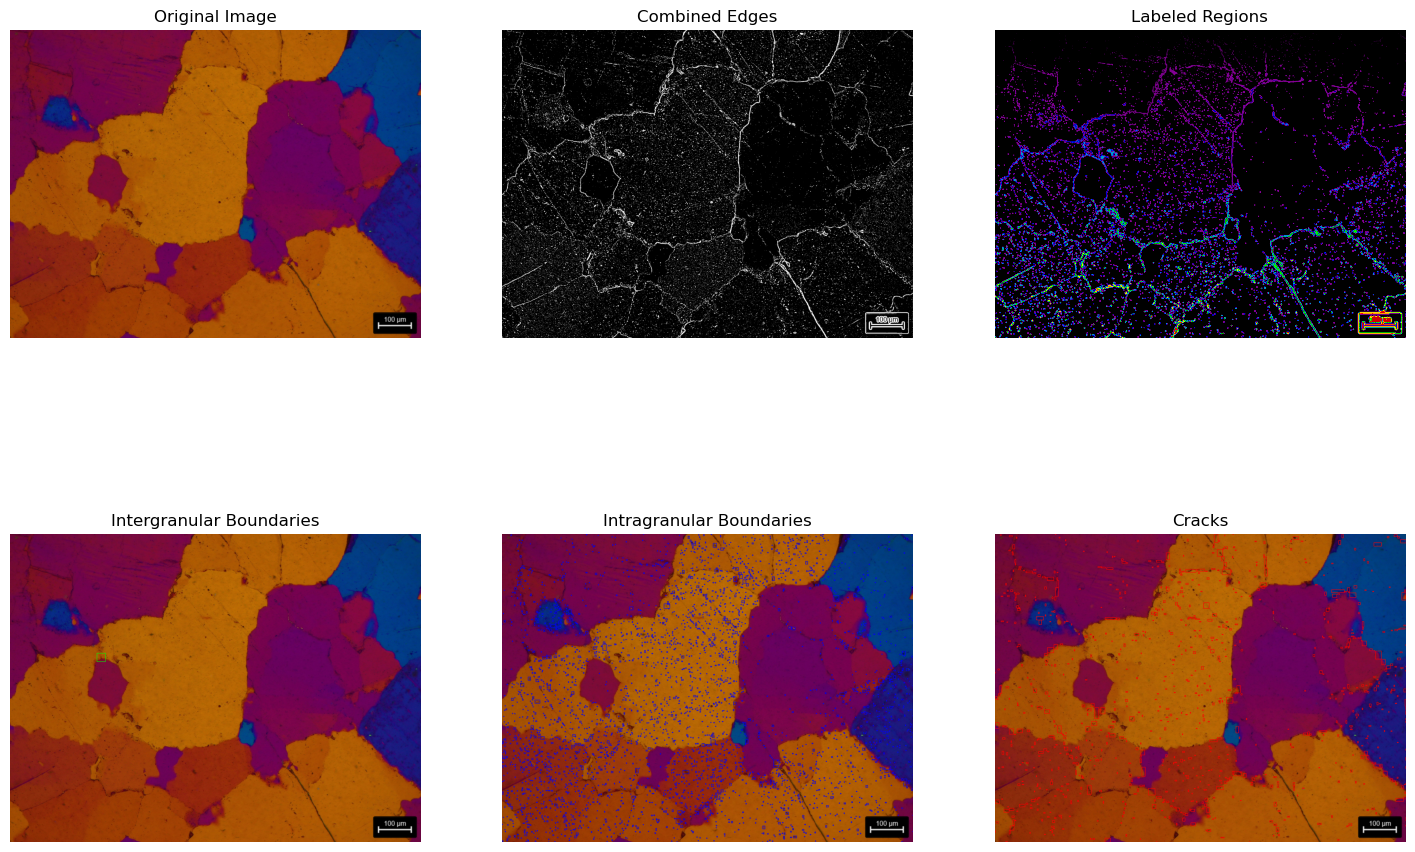

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Combine the adaptive threshold and Canny edges
combined_edges = cv2.bitwise_or(adaptive_thresh, edges)

# Apply morphological operations to clean up the edges
kernel = np.ones((3, 3), np.uint8)
morph_edges = cv2.morphologyEx(combined_edges, cv2.MORPH_CLOSE, kernel, iterations=2)
morph_edges = cv2.morphologyEx(morph_edges, cv2.MORPH_OPEN, kernel, iterations=1)

# Label connected components
labels = label(morph_edges)

# Analyze properties of labeled regions
regions = regionprops(labels)

# Prepare images to display results
contour_image = image.copy()
intergranular_image = image.copy()
intragranular_image = image.copy()
crack_image = image.copy()

for region in regions:
    # Get coordinates of the bounding box
    minr, minc, maxr, maxc = region.bbox
    # Get the area of the region
    area = region.area
    # Get the eccentricity of the region
    eccentricity = region.eccentricity

    # Classify based on area and eccentricity
    if area > 500 and eccentricity < 0.5:
        # Likely an intergranular boundary
        cv2.rectangle(intergranular_image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    elif area <= 500 and eccentricity >= 0.5:
        # Likely an intragranular boundary or crack
        if eccentricity > 0.9:
            # Likely a crack
            cv2.rectangle(crack_image, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
        else:
            # Likely an intragranular boundary
            cv2.rectangle(intragranular_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Combined Edges')
plt.imshow(combined_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Labeled Regions')
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Intergranular Boundaries')
plt.imshow(cv2.cvtColor(intergranular_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Intragranular Boundaries')
plt.imshow(cv2.cvtColor(intragranular_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Cracks')
plt.imshow(cv2.cvtColor(crack_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


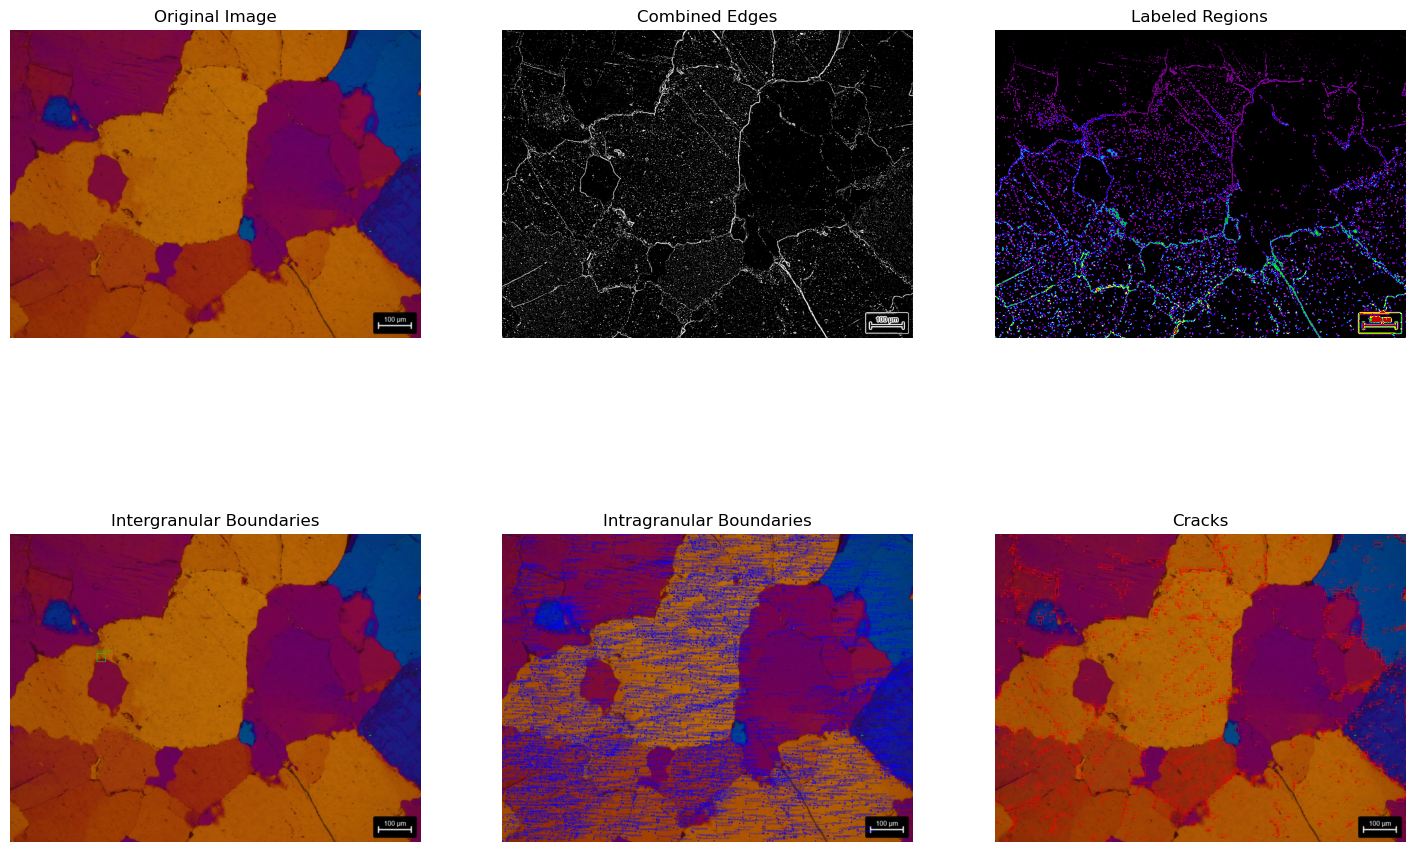

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Load the image
image_path = '6.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Combine the adaptive threshold and Canny edges
combined_edges = cv2.bitwise_or(adaptive_thresh, edges)

# Apply morphological operations to clean up the edges
kernel = np.ones((3, 3), np.uint8)
morph_edges = cv2.morphologyEx(combined_edges, cv2.MORPH_CLOSE, kernel, iterations=2)
morph_edges = cv2.morphologyEx(morph_edges, cv2.MORPH_OPEN, kernel, iterations=1)

# Label connected components
labels = label(morph_edges)

# Analyze properties of labeled regions
regions = regionprops(labels)

# Prepare images to display results
intergranular_image = image.copy()
intragranular_image = image.copy()
crack_image = image.copy()

for region in regions:
    # Get coordinates of the bounding box
    minr, minc, maxr, maxc = region.bbox
    # Get the area of the region
    area = region.area
    # Get the eccentricity of the region
    eccentricity = region.eccentricity

    # Classify based on area and eccentricity
    if area > 500 and eccentricity < 0.5:
        # Likely an intergranular boundary
        cv2.rectangle(intergranular_image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
        cv2.putText(intergranular_image, 'Intergranular', (minc, minr - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    elif area <= 500 and eccentricity >= 0.5:
        # Likely an intragranular boundary or crack
        if eccentricity > 0.9:
            # Likely a crack
            cv2.rectangle(crack_image, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
            cv2.putText(crack_image, 'Crack', (minc, minr - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        else:
            # Likely an intragranular boundary
            cv2.rectangle(intragranular_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
            cv2.putText(intragranular_image, 'Intragranular', (minc, minr - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the results
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Combined Edges')
plt.imshow(combined_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Labeled Regions')
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Intergranular Boundaries')
plt.imshow(cv2.cvtColor(intergranular_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Intragranular Boundaries')
plt.imshow(cv2.cvtColor(intragranular_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Cracks')
plt.imshow(cv2.cvtColor(crack_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [11]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('6.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw boundaries
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.drawContours(img, [contour], -1, (0, 255, 0), 1)  # Draw intergranular boundaries in green

# Apply edge detection to find cracks
edges = cv2.Canny(gray, 50, 150)

# Iterate through the edges and draw cracks
for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x] > 0:
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)  # Draw cracks in red

# Display the output
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()